# Глава 5: Работа с категориальными данными

# Введение

 Часто бывает полезно разбивать данные не по количеству, а по качеству. 
Эта качественная информация нередко представляется как принадлежность наблюдения к отдельной категории, такой как пол, цвета или марка автомобиля. 

Однако не все категориальные данные одинаковы. Наборы категорий без внутреннего упорядочения называют "номинальными". 

Примеры номинальных категорий включают:
- синий, красный, зеленый;
- мужчина, женщина;
- банан, клубника, яблоко.

С другой стороны, когда набор категорий имеет некое естественное упорядочение, мы называем его порядковым. 

Например:
- низкий, средний, высокий;
- молодые, старые;
- согласен, нейтрален, не согласен. 

-----------------------------------------------------------------------------------------------------

Более того, категориальная информация часто представлена в данных в виде вектора или столбца символьных значений (например, "Мэн", "Техас", "Делавер"). 

Проблема в том, что большинство машинно-обучающихся алгоритмов требуют ввода числовых значений. 

Алгоритм k - ближайших соседей предоставляет простой пример. Одним из шагов в алгоритме является вычисление расстояний между наблюдениями - часто с использованием **Евклидова расстояния**:

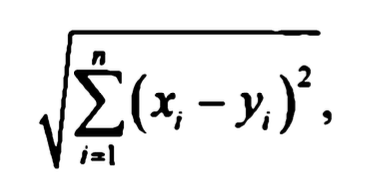

Где x, y - это два наблюдения, i - номер признака наблюдений

------------------------------------------------------------------------------------------------------

Однако вычисление расстояния очевидно невозможно, если значение x(i) является строковым типом (например "Texas"). 

Для того чтобы его можно было ввести в уравнение евклидова расстояния, нам нужно преобразовать это строковое значение в числовой формат. 

**Наша цель** - сделать преобразование, которое правильно передает информацию в категориях (упорядоченность, относительные интервалы между категориями и т.д)

В этой главе я рассмотрю методы этого преобразования, а также выясню, как преодолеть другие проблемы, часто возникающие при обработке категориальных данных.

# 5.1 Кодирование номинальных категориальных признаков

**Задача**: Дан признак с номинальными классами, который не имеет внутренней упорядоченности (например, яблоко, груша, банан)

**Решение**: Преобразовать признак в кодировку с одним *активным* состоянием с помощью класса `LabelBinarizer` библиотеки **scikit-learn**. 

In [3]:
import numpy as np 
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

# Создаю признак

feature = np.array([['Texas'],
                    ['California'],
                    ['Texas'],
                    ['Delawer'],
                    ['Texas']])

# Создаю кодировщик одного активного состояния

one_hot = LabelBinarizer()

# Преобразовать признак в кодировку с одним активным состоянием

one_hot.fit_transform(feature)


array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

**Для вывода классов кодировщика можно воспользоваться функцией `classes_`**:

In [4]:
# Взглянуть на классы признака

one_hot.classes_

array(['California', 'Delawer', 'Texas'], dtype='<U10')

**Если потребуется обратить кодирование с одним активным состоянием, то можно воспользоваться функцией `inverse_transform`**:

In [8]:
# Обратить кодирование с одним активным состоянием

one_hot.inverse_transform(one_hot.fit_transform(feature))

array(['Texas', 'California', 'Texas', 'Delawer', 'Texas'], dtype='<U10')

**Для преобразования признака в кодировку с одним активным состоянием можно даже использовать `pandas`**:

In [11]:
import numpy as np 
import pandas as pd 

# Создаю фиктивные перменные из признака

pd.get_dummies(feature[:,0])


,California,Delawer,Texas
0,False,False,True
1,True,False,False
2,False,False,True
3,False,True,False
4,False,False,True


Одной из полезных функций из библиотеки scikit-learn является обработка ситуации, когда в каждом наблюдении перечисляется несколько классов:

In [16]:
# Создаю мультиклассовый признак
multiclass_feature = [("Texas", "Florida"),
                      ("California", "Alabama"), 
                      ("Texas", "Florida"),
                      ('Delaware', 'Florida'),
                      ('Texas', 'Alabama')]

# Создаю мультиклассовый кодировщик, преобразующий признак в кодировку с одним активным признаком

one_hot_multiclass = MultiLabelBinarizer()

# Кодирую мультиклассовый признак в кодировку с одним активным состоянием 
# Ориентир на алфавит - 0 там где нет города в строке, 1 - есть 
# Алабама - 1, Калифорния - 2,  Делавер - 3, Флорида - 4, Техас - 5

one_hot_multiclass.fit_transform(multiclass_feature)


array([[0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1]])

In [17]:
# С помощью pandas

pd.get_dummies(multiclass_feature)

,"(California, Alabama)","(Delaware, Florida)","(Texas, Alabama)","(Texas, Florida)"
0,False,False,False,True
1,True,False,False,False
2,False,False,False,True
3,False,True,False,False
4,False,False,True,False


In [19]:
# Взглянуть на мультиклассы признака
one_hot_multiclass.classes_

array(['Alabama', 'California', 'Delaware', 'Florida', 'Texas'],
      dtype=object)

-----------------------------------------------------------------------------------------------------

**Обсуждение**:

Можно подумать, что правильная стратегия состоит в том, чтобы назначать каждому классу числовое значение (например, Texas = 1, California = 2). 

Однако, когда классы не имеют внутренней упорядоченности (например, Техас не меньше Калифорнии), числовые значения создают ложный порядок, которого нет. 

Правильной стратегией является создание в исходном признаке бинарного признака для каждого класса. Это нередко называется ***кодированием с одним активным состоянием*** (в лит-ре по машинному самообучению) или *фиктивизацией* (в статистической и научно-исследовательской литературе). 

Признаком в моём примере был вектор, содержащий три класса (Техас, Калифорния и Дэлавер). 
В кодировании с одним активным состоянием каждый класс становится одноэлементным признаком с единицами, когда класс появляется и нулями, когда отсутствует. 

Поскольку наш признак имел три класса, кодирование с одним активным признаком вернуло три бинарных признака (по одному для каждого класса). Используя кодирование с одним активным состоянием, можно фиксировать принадлежность наблюдения к классу, сохраняя при этом сведения о том, что в классе отсутствует какая-либо иерархия. 

Наконец, стоит отметить, что после кодирования признака в кодировку с одним активным состоянием часто рекумендуется отбрасывать один из закодированных в результирующей матрице признаков, чтобы избежать линейной зависимости.  

-----------------------------------------------------------------------------------------------------

**Дополнительный материал для чтения**:

- "Ловушка фиктивной переменной", блог Algosome (http://bit.ly/2FvVJkC).
- "Исключение одного из столбцов при использовании кодирования с одним ак­тивным состоянием" вопросно-ответный статистический ресурс CrossValidated (http://bit.ly/2FwrxG0).

# 5.2 Кодированеи порядковых категориальных призанков

**Задача**: Дан порядковый категориальный признак (например, высокий, средний, низкий). Необходимо выполнить его кодировку

**Решение**: Использовать метод `replace` фрейма данных pandas для преобразование строковых меток в числовые эквиваленты:

In [3]:
import pandas as pd 

# Создаю признаки

dataframe = pd.DataFrame({'оценка': ['низкая', 'низкая', 'средняя', 'средняя', 'высокая']})

# Создаю словарь преобразования шкалы

scale_mapper = {'низкая': 1, 
                'средняя': 2, 
                'высокая': 3}

# Заменяю значения признаков значениями из словаря

dataframe['оценка'].replace(scale_mapper)

/var/folders/ym/1stkpf9161g9k_wbnvf_4jrh0000gn/T/ipykernel_62222/3813658453.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/folders/ym/1stkpf9161g9k_wbnvf_4jrh0000gn/T/ipykernel_62222/3813658453.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['оценка'].replace(scale_mapper)


0    1
1    1
2    2
3    2
4    3
Name: оценка, dtype: int64

-----------------------------------------------------------------------------------------------------

**Обсуждение**:

Нередко существует признак с классами, которые имеют какую-то естественную упорядоченность. Известный пример - шкала Лайкерта:

- **полностью согласен**

- **согласен**

- **нейтрален**

- **не согласен**

- **полностью не согласен**

При кодировании признака для использования в машинном самообучении требуется преобразовать порядковые классы в значения, которые поддерживают идею упорядоченности. 

Наиболее распространенным подходом является создание словаря, который в соответствие строковой метке ставит число, а затем применяет это соотнесение к признаку. 

Важно, чтобы выбор числовых значений основывался на имеющейся априорной информации о порядковых классах. В моём решении метка *высокая* буквально в три раза больше метки *низкая*. Это нормально в обычных случаях, но может нарушится, если принятые интервалы между классами не равны: 

In [4]:
dataframe = pd.DataFrame({"оценка": ["низкая", 
                                     "низкая",
                                     "средняя",
                                     "средняя",
                                     "высокая",
                                     "чуть больше средней"]})


scale_mapper = {"низкая":1, "средняя":2,
"чуть больше средней": 3, "высокая":4}

dataframe['оценка'].replace(scale_mapper)

/var/folders/ym/1stkpf9161g9k_wbnvf_4jrh0000gn/T/ipykernel_62222/2519938938.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['оценка'].replace(scale_mapper)


0    1
1    1
2    2
3    2
4    4
5    3
Name: оценка, dtype: int64

В этом примере расстояние между *низкой* и *средней* равно расстоянию между *средней* и *чуть больше средней*, что почти наверняка **не является точныи**. 

Лучший подход состоит в том, чтобы учитывать числовые значения сопоставление со строковыми метками (классами). 

In [6]:
scale_mapper = {"низкая":1, 
                "средняя":2,
                "чуть больше средней": 2.1, 
                "высокая":3}

dataframe['оценка'].replace(scale_mapper)

/var/folders/ym/1stkpf9161g9k_wbnvf_4jrh0000gn/T/ipykernel_62222/1636029967.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['оценка'].replace(scale_mapper)


0    1.0
1    1.0
2    2.0
3    2.0
4    3.0
5    2.1
Name: оценка, dtype: float64

-----------------------------------------------------------------------------------------------------

# 5.3 Кодирование словарей признаков

**Задача**: Дан словарь, требуется конвертировать его в матрицу признаков 

**Решение**: Использую класс-векторизатор словаря `DictVectorizer`

In [9]:
from sklearn.feature_extraction import DictVectorizer

# Создаю словарь 

data_dict = [{'красный': 2, 'синий': 4},
             {'красный': 4, 'синий': 3},
             {'красный': 1, 'синий': 2},
             {'красный': 2, 'желтый': 2}]

# Создаю объект класса - функции

dict_vectorizer = DictVectorizer(sparse=False)

# Конвертирую словарь в матрицу признаков

features = dict_vectorizer.fit_transform(data_dict)

# Смотрим результат

features

array([[0., 2., 4.],
       [0., 4., 3.],
       [0., 1., 2.],
       [2., 2., 0.]])

По умолчанию `DicrVectorizer` выводи разреженную матрицу, в которой хранятся элементы отличные от нуля. 

Это может быть очень полезно, когда имеются массивные матрицы (часто встречающиеся в обработке естественного языка) и требуется минимизировать потебность в оперативной памяти. 

Я заставил вывести `DictVectorizer` плотную матрицу, используя `sparse = False`

Имена каждого созданного признака можно получить следующим образом:


In [10]:
# Получаю имена признаков

feature_names = dict_vectorizer.get_feature_names_out()

feature_names

array(['желтый', 'красный', 'синий'], dtype=object)

Доп фишка, мы можем использовать Pandas для визуализации, чтобы результат выглядел получше

In [11]:
import pandas as pd

pd.DataFrame(features, columns=feature_names)

,желтый,красный,синий
0,0.0,2.0,4.0
1,0.0,4.0,3.0
2,0.0,1.0,2.0
3,2.0,2.0,0.0


-----------------------------------------------------------------------------------------------------

**Обсуждение**:

Словарь является популярной структурой данных, используемой многими языками программирования, но машинно-обучающиеся алгоритмы ожидают, что данные будут представленны в виде матрицы. 

Конвертировать словарь в матрицу можно, используя объект `DictVectorizer` из библиотеки `sklearn`

Такая ситуация является обычной во время обработки естественного языка. Например дана коллекция документов, и для каждого документа имеется словарь, содержащий количество вхождений каждого слова в документ.

Используя объект `dict_vectorizer`, можно легко создать матрицу признаков, где каждый признак - количество вхождений слова в каждый документ: 

In [12]:
# Создаю словари частотностей слов для четырех документов

doc_1_word_count = {'красный': 2, 'синий': 4}

doc_2_word_count = {'красный': 4, 'синий': 3}

doc_3_word_count = {'красный': 1, 'желтый': 2}

doc_4_word_count = {'красный': 2, 'желтый': 2}


# Создам список 

docs_array = [doc_1_word_count, doc_2_word_count, doc_3_word_count, doc_4_word_count]

# Конвертирую список словарей частотностей в матрицу признаков

dict_vectorizer.fit_transform(docs_array)

array([[0., 2., 4.],
       [0., 4., 3.],
       [2., 1., 0.],
       [2., 2., 0.]])

Мой пример игрушечный, так как есть всего три уникальных слова (красный, синий, желтый), поэтому в матрице всего три признака, однако мы можем себе представить какой была бы такая матрица, если бы каждый из этих документов был университетской книгой, была бы очень большой очевидно. 

Также потребовалось бы изменить `spase = True`


**Дополнительные материалы для чтения**:
- "Как применять словари в Python", ресурс для новичков PythonForBeginners (http://bit.ly/2HReoWz).

- "Разреженные матрицы SciPy" (http://bit.ly/2HReBZR).

# 5.4 Импутация пропущенных значений классов

**Задача**: Дан категориальный признак, содержащий пропущенные значения, которые требуется заменить предсказанными значениями. 

**Решение**: Идеальным решением будет натренировать машинно-обучающийся классификационный алгоритм для предсказания пропущенных значений, обычно классификатор **k - ближайщих соседей (KNN)**:

In [5]:
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier

# Создаю матрицу признаков с категориальным признаком

X = np.array([[0, 2.10, 1.45],
              [1, 1.18, 1.33], 
              [0, 1.22, 1.27], 
              [1, -0.21, -1.19]])

In [6]:
# Создаю матрицу признаков с отсутствующими значениями 

X_with_nan = np.array([[np.nan, 0.87, 1.31],
                       [np.nan, -0.67, -0.22]])

In [7]:
# Тренирую ученика KNN

clf = KNeighborsClassifier(3, weights='distance')
trained_model = clf.fit(X[:,1:], X[:,0])

In [8]:
# Предсказать класс прпоущенных значений 

imputed_values = trained_model.predict(X_with_nan[:,1:])

In [9]:
# Соединить столбец предказанного класса с другими признаками

X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))


In [10]:
# Соединяю две матрицы признаков 

np.vstack((X_with_imputed, X))

array([[ 0.  ,  0.87,  1.31],
       [ 1.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

**Альтернативныым решением** будет заполнить пропущенные значения наиболее частыми значениями признаков

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np

# Соединю две матрицы признаков

X_complete = np.vstack((X_with_nan, X))

imputer = SimpleImputer(strategy='most_frequent')

imputer.fit_transform(X_complete)

array([[ 0.  ,  0.87,  1.31],
       [ 0.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

**Примеры для понимания**

Тут заполнил средним значением:

In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Создам DataFrame с пропущенными значениями
data = {'age': [30, 25, np.nan, 35, 40],
        'salary': [60000, 50000, 70000, np.nan, 80000]}
df = pd.DataFrame(data)

# Создам объект SimpleImputer с стратегией 'mean'
imputer = SimpleImputer(strategy='mean')

# Заполню пропущенные значения средним значением 
df_imputed = imputer.fit_transform(df)

# Преобразую результат обратно в DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print(df_imputed)

    age   salary
0  30.0  60000.0
1  25.0  50000.0
2  32.5  70000.0
3  35.0  65000.0
4  40.0  80000.0


Тут заполнил как в основном примере наиболее частыми значениями:

In [14]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Создаю DataFrame с пропущенными значениями
data = {'city': ['London', 'Paris', 'Berlin', np.nan, 'Rome', np.nan]}
df = pd.DataFrame(data)

# Создаю объект SimpleImputer с стратегией 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Заполняю пропущенные значения наиболее частым значением
df_imputed = imputer.fit_transform(df)

# Преобразую результат обратно в DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print(df_imputed)

     city
0  London
1   Paris
2  Berlin
3  Berlin
4    Rome
5  Berlin


Тут сделал через медиану:

In [15]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Создаем DataFrame с пропущенными значениями
data = {'age': [30, 25, np.nan, 35, 40],
        'salary': [60000, 50000, 70000, np.nan, 80000]}
df = pd.DataFrame(data)

# Создаем объект SimpleImputer с стратегией 'median'
imputer = SimpleImputer(strategy='median')

# Заполняем пропущенные значения медианой 
df_imputed = imputer.fit_transform(df)

# Преобразуем результат обратно в DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print(df_imputed)

    age   salary
0  30.0  60000.0
1  25.0  50000.0
2  32.5  70000.0
3  35.0  65000.0
4  40.0  80000.0


-----------------------------------------------------------------------------------------------------

**Обсуждение**:

Когда в категориальном признаке имеются пропущенные значения, лучшее решение - взять инструментальный комплект машинно - обучающихся алгоритмов для предксказания значений пропущенных наблюдений. 

Мы можем сделать это, рассматривая признак с пропущенными значениями как вектор целей, а другие признаки - как матрицу признаков. Общепринято использовать алгоритм (подробно рассмотренный далее в этой книге), который присваивает пропущенному значению **медианный класс k - ближайщих наблюдений**. 

Кроме того, пропущенные значения можно заполнить наиболее часто используемым классом признака. Хотя он менее сложен, чем KNN, он гораздо более масштабируем для более крупных данных. 

В любом случае рекомендуется включить бинарный признак, указывающий на то, какие наблюдения содержат импутированные значения.  

-----------------------------------------------------------------------------------------------------

**Дополнительные материалы для чтения**:

- "Преодоление пропущенных значений в классификаторе на основе случайного леса", веб-сайт для аналитиков данных Airbnb Engineering & Data Science (http://bit.ly/2HSsNBF).

- "Исследование применения к ближайших соседей как метода импутации" ("A Study of К-Nearest Neighbour as an Imputation Method"), статья (http://bit.ly/2HS9sAT).

# 5.5 Работа с несбалансированными классами

**Задача**: Дан вектор целей с очень несбалансированными классами. 

**Решение**: Собрать больше данных. Если это невозможно, то изменить метрические показатели, используемые для оценки модели. 

Если это не работает - то рассмотреть возможность использования встроенных в модель параметров веса классов (если таковые имеются), делая понижающий или повышающий отбор. Я рассмотрю метрические показания оцениваия чуть позже в одной из глав, а пока сосредоточусь на параметрах веса классов на повышающем и понижающем отборе.

Для того чтобы продемонстрировать наши решения, нам нужно создать немного данных с несбалансированными классами. Набор данных ирисов Фишера содержит три сбалансированных класса по 50 наблюдений, каждый из которых указывает на вид цветка — *ирис щетинистый (Iris setosa)*, *ирис виргинский (Iris virginica)* и *ирис разноцветный (Iris versicolor)*. 

Для того чтобы разбалансировать набор данных, мы удаляем 40 из 50 наблюдений *ириса щетинистого*, а затем объединяем классы *ирис виргинский* и *ирис разноцветный*. Конечным результатом является бинарный век­тор целей, указывающий на то, является ли наблюдение цветком ириса щетини­стого или нет. Результатом станут 10 наблюдений *ирис щетинистый* (класс 0) и 100 наблюдений *не ирис щетинистый* (класс 1):

In [19]:
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris


# Загружаю данные цветков ириса Фишера
iris = load_iris()

# Создаю матрицу признаков
features = iris.data

# Создаю вектор целей 
target = iris.target 

# Отрезаю первые 40 наблюдений 
features = features[40:,:]
target = target[40:]

# Создаю бинарный вектор целей, указывающий, является ли класс 0
target = np.where((target == 0), 0, 1)

target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Многие алгоритмы в scikit-learn предлагают параметр для взвешивания классов во время тренировки, чтобы противодействовать эффекту их разбалансировки. 

Хотя я его ещё не рассматривал, классификатор на основе случайного леса `RandomForestClassifier` является популярным классификационным алгоритмом и включает параметр `class_weight`. 

Можем передать этот аргумент, явно задающий желаемые веса классов. 

In [22]:
# Создаю вес 
weight = {0: .9, 1: 0.1}

# Создаю классификатор на основе случайного леса с весами 
RandomForestClassifier(class_weight=weight)
RandomForestClassifier(bootstrap=True, class_weight={0: .9, 1: 0.1},
                       criterion= 'gini', max_depth= None, 
                       max_features= 'auto',
                       max_leaf_nodes= None, min_impurity_decrease= 0.0,
                       min_samples_leaf = 1,
                       min_samples_split= 2, min_weight_fraction_leaf= 0.0,
                       n_estimators= 10, n_jobs= 1, oob_score= False, random_state= None,
                       verbose= 0, warm_start= False 
                       )

RandomForestClassifier(class_weight={0: 0.9, 1: 0.1}, max_features='auto',
                       n_estimators=10, n_jobs=1)

Либо передать аргумент `balanced` , который автоматически создает веса, обратно пропорциональные частотам классов:

In [24]:
# Натренировать случайный лес с помощью сбалансированных весов классов 
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier(class_weight='balanced')

RandomForestClassifier(bootstrap=True, class_weight='balanced', 
                       criterion='gini', max_depth=None,
                       max_features='auto', 
                       max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       min_samples_leaf=1, 
                       min_samples_split=2, min_weight_fraction_leaf=0.0, 
                       n_estimators=10, n_jobs=1, oob_score=False, 
                       random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(class_weight='balanced', max_features='auto',
                       n_estimators=10, n_jobs=1)

В качестве альтернативы можно понизить мажоритарный класс. В понижающем отборе мы произвольно делаем выборку без возврата из мажоритарного класса (т.е класса с большим кол-ом наблюдений.), чтобы создать новое подмножество наблюдений, равное по размеру миноритарному классу. 

Например если миноритарный класс имеет 10 наблюдений мы случайным образом отберем 10 наблюдений из мажоритарного класса и используем 20 наблюдений в качестве наших данных. 

Сделаем это, используя наши несбалансированные данные цветков ириса:

In [25]:
# Индексы наблюдений каждого класса
i_class0 = np.where(target == 0)[0]
i_class1 = np.where(target == 1)[0]


In [26]:
# Количество наблюдений в каждом классе
n_class0 = len(i_class0)
n_class1 = len(i_class1)


In [27]:
# Для каждого наблюдения класса 0 сделать случайную выборку 
# Из 1 класса без возврата
i_class_downsampled = np.random.choice(i_class1, size=n_class0, replace=False)

In [28]:
# Соединяю вектор целей класса 0 с вектором целей пониженного класса 1 
np.hstack((target[i_class0], target[i_class_downsampled]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
# Соединяю матрицу признаков класса 0 с матрицей признаков пониженного класса 1 
np.vstack((features[i_class0,:], features[i_class_downsampled]))[0:5]

array([[5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4]])

Другой вариант — повысить миноритарный класс. В повышающем отборе для каждого наблюдения в мажоритарном классе мы случайно отбираем наблюдение из миноритарного класса с возвратом. 

Конечным результатом является одинаковое количество наблюдений из миноритарных и мажоритарных классов. Повышающий отбор реализуется очень похоже на понижающий отбор, только наоборот:

In [37]:
# Для каждого наблюдения в классе 1 сделать случайную выборку
# Из класса 0 с возвратом
i_classO_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)

In [38]:

# Соединить повышенный вектор целей класса О
# С вектором целей класса 1 
np.concatenate((target[i_classO_upsampled], target[i_class1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [39]:
# Соединить повышенную матрицу признаков класса 0
# с матрицей признаков класса 1 
np.vstack((features[i_classO_upsampled,:], features[i_class1,:]))[0:5]

array([[5.3, 3.7, 1.5, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.3, 3.7, 1.5, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.3, 0.3]])

-----------------------------------------------------------------------------------------------------

**Обсуждение**:

В реальном мире несбалансированные классы встречаются повсюду — большинст­во посетителей не нажимают кнопку **Купить**, и многие виды рака, к счастью, — редки. По этой причине обработка несбалансированных классов является в машин­ ном самообучении распространенной задачей.

Наша лучшая стратегия — просто собрать больше наблюдений, в особенности наблюдений из миноритарного класса. Однако зачастую это просто невозможно, поэтому приходится прибегать к другим вариантам.

Вторая стратегия заключается в использовании модельногоо оценочного показате­ля, более подходящего для несбалансированных классов. В качестве метрического показателя оценки результативности модели часто используется точность, но при наличии несбалансированных классов показатель точности может не подходить. 

Например, если только 0.5% наблюдений указывают на редкий вид рака, то даже наивная модель, предсказывающая, что ни у кого нет рака, будет точной на 99.5%. Очевидно, что это не идеально. Некоторые более эффективные метрические пока­затели, которые мы обсудим в последующих главах, — это **матрицы ошибок**, **пре­цизионность**, **полнота**, **оценки F(1) и кривые ROC**.


Третья стратегия заключается в использовании параметров взвешивания класса, включенных в реализации некоторых моделей. Это позволяет настроить алгоритм для несбалансированных классов. К счастью, многие классификаторы библиотеки `scikit-learn` имеют параметр `class weight`, что делает эту стратегию хорошим вари­антом.


Четвертая и пятая стратегии взаимосвязаны: понижающий и повышающий отбор. При понижающем отборе мы создаем случайное подмножество мажоритарного класса одинакового размера с миноритарным классом. При повышающем отборе мы неоднократно отбираем образцы из миноритарного класса с заменой, чтобы сделать его равного размера с мажоритарным классом. Решение между использо­ванием понижающего и повышающего отбора зависит от контекста, и в целом мы должны попытаться увидеть, который из них дает лучшие результаты.